Notebook to get data: GDP hourly datasets and SST datasets from Copernicus (see if there is something from NASA)

In [1]:
# import SST dataset from copernicus
import copernicusmarine
from pprint import pprint

/opt/homebrew/Caskroom/mambaforge/base/envs/oceanuq-wednesday/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# getting Mediterranean Sea - High Resolution Diurnal Subskin Sea Surface Temperature Analysis
dataset_name = "cmems_obs-sst_med_phy-sst_nrt_diurnal-oi-0.0625deg_PT1H-m"
#copernicusmarine.download(dataset, "2020-01-01", "2020-01-01", "sst.nc")
dataset = copernicusmarine.describe(contains=[dataset_name],include_datasets=True)


Fetching catalog: 100%|██████████| 3/3 [00:23<00:00,  7.92s/it]


In [3]:
# Copernicus Marine Service requires username and password
# username
# password
copernicusmarine.subset(
  dataset_id=dataset_name,
  start_datetime="2020-01-01T00:00:00",
  end_datetime="2020-01-01T23:59:59",
  output_filename = "test_download.nc",
  force_download=True,
  )

username:

In [2]:
import xarray as xr
ds = xr.open_dataset("test_download.nc")
ds

<xarray.Dataset> Size: 148MB
Dimensions:           (time: 24, latitude: 253, longitude: 871)
Coordinates:
  * latitude          (latitude) float32 1kB 30.25 30.31 30.38 ... 45.94 46.0
  * longitude         (longitude) float32 3kB -18.12 -18.06 ... 36.19 36.25
  * time              (time) datetime64[ns] 192B 2020-01-01 ... 2020-01-01T23...
Data variables:
    analysed_sst      (time, latitude, longitude) float64 42MB ...
    analysis_error    (time, latitude, longitude) float64 42MB ...
    mask              (time, latitude, longitude) float32 21MB ...
    sea_ice_fraction  (time, latitude, longitude) float64 42MB ...
Attributes: (12/50)
    Conventions:                CF-1.4
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    Scaling_Equation:           (scale_factor*data) + add_offset
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    WARNING: some applications are unable to prop...
    ...                         ...
    time_coverage_end:          20190101T003000Z
    time_coverage_start:        20181231T233000Z
    title:                      Mediterranean Sea Diurnal Subskin SST Analysi...
    uuid:                       49bad394-a78b-11eb-89ce-0050569e4eb7
    westernmost_longitude:      -18.125
    copernicusmarine_version:   1.2.4

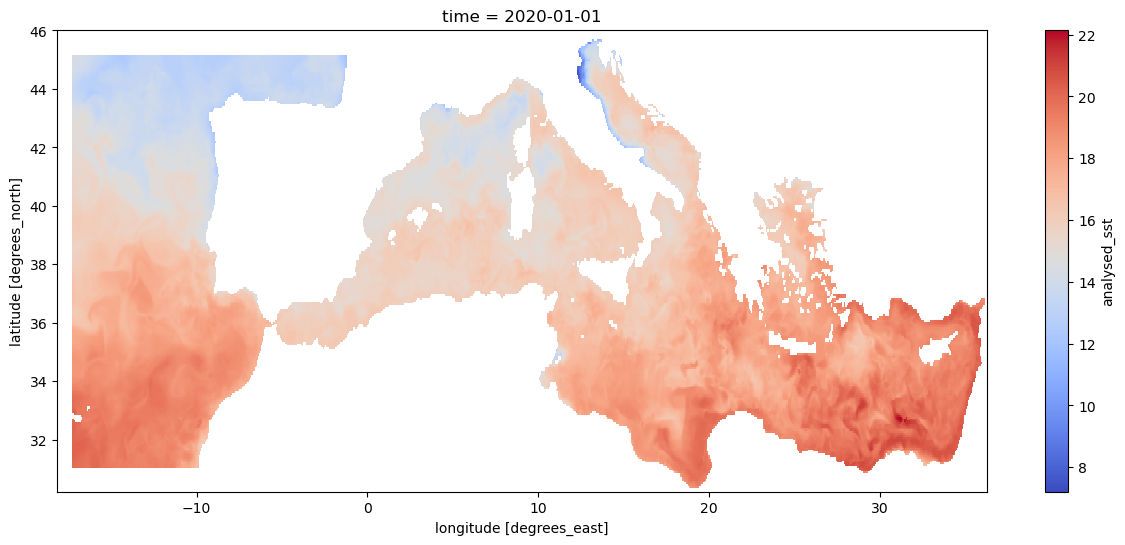

In [3]:
(ds["analysed_sst"]-273.15).isel(time=0).plot(figsize=(15, 6), cmap="coolwarm")

In [4]:
print(ds.attrs['westernmost_longitude'])
print(ds.attrs['easternmost_longitude'])
print(ds.attrs['southernmost_latitude'])
print(ds.attrs['northernmost_latitude'])

-18.125
36.25
30.25
46.0


In [62]:
import clouddrift as cd

In [63]:
ds2 = cd.datasets.gdp1h()
ds2

<xarray.Dataset> Size: 16GB
Dimensions:                (traj: 19396, obs: 197214787)
Coordinates:
    id                     (traj) int64 155kB ...
    time                   (obs) datetime64[ns] 2GB ...
Dimensions without coordinates: traj, obs
Data variables: (12/59)
    BuoyTypeManufacturer   (traj) |S20 388kB ...
    BuoyTypeSensorArray    (traj) |S20 388kB ...
    CurrentProgram         (traj) float32 78kB ...
    DeployingCountry       (traj) |S20 388kB ...
    DeployingShip          (traj) |S20 388kB ...
    DeploymentComments     (traj) |S20 388kB ...
    ...                     ...
    start_lat              (traj) float32 78kB ...
    start_lon              (traj) float32 78kB ...
    typebuoy               (traj) |S10 194kB ...
    typedeath              (traj) int8 19kB ...
    ve                     (obs) float32 789MB ...
    vn                     (obs) float32 789MB ...
Attributes: (12/16)
    Conventions:       CF-1.6
    acknowledgement:   Elipot, Shane; Sykulski, Adam; Lumpkin, Rick; Centurio...
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    date_created:      2023-09-08T17:05:12.130123
    doi:               10.25921/x46c-3620
    ...                ...
    processing_level:  Level 2 QC by GDP drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    publisher_name:    GDP Drifter DAC
    publisher_url:     https://www.aoml.noaa.gov/phod/gdp
    summary:           Global Drifter Program hourly data
    title:             Global Drifter Program hourly drifting buoy collection

In [104]:
x1 = ds.attrs['westernmost_longitude']
x2 = ds.attrs['easternmost_longitude']
y1 = ds.attrs['southernmost_latitude']
y2 = ds.attrs['northernmost_latitude']
import numpy as np
criteria = {"lon": (x1, x2), "lat": (y1, y2), "time": (np.datetime64("2020-01-01T00:00:00"), np.datetime64("2020-01-01T23:59:59"))}

In [109]:
# import clouddrift as cd
# ds2 = cd.datasets.gdp1h()
criteria = {"lon": (x1, x2), "lat": (y1, y2), "time": (np.datetime64("2020-01-01T00:00:00"), np.datetime64("2020-01-01T23:59:59"))}
ds2_sub = cd.ragged.subset(ds2,criteria, )

In [110]:
ds2_sub

<xarray.Dataset> Size: 53kB
Dimensions:                (traj: 23, obs: 552)
Coordinates:
    id                     (traj) int64 184B 300234063942850 ... 300234068054200
    time                   (obs) datetime64[ns] 4kB 2020-01-01 ... 2020-01-01...
Dimensions without coordinates: traj, obs
Data variables: (12/59)
    BuoyTypeManufacturer   (traj) |S20 460B ...
    BuoyTypeSensorArray    (traj) |S20 460B ...
    CurrentProgram         (traj) float32 92B ...
    DeployingCountry       (traj) |S20 460B ...
    DeployingShip          (traj) |S20 460B ...
    DeploymentComments     (traj) |S20 460B ...
    ...                     ...
    start_lat              (traj) float32 92B ...
    start_lon              (traj) float32 92B ...
    typebuoy               (traj) |S10 230B ...
    typedeath              (traj) int8 23B ...
    ve                     (obs) float32 2kB ...
    vn                     (obs) float32 2kB ...
Attributes: (12/16)
    Conventions:       CF-1.6
    acknowledgement:   Elipot, Shane; Sykulski, Adam; Lumpkin, Rick; Centurio...
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    date_created:      2023-09-08T17:05:12.130123
    doi:               10.25921/x46c-3620
    ...                ...
    processing_level:  Level 2 QC by GDP drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    publisher_name:    GDP Drifter DAC
    publisher_url:     https://www.aoml.noaa.gov/phod/gdp
    summary:           Global Drifter Program hourly data
    title:             Global Drifter Program hourly drifting buoy collection

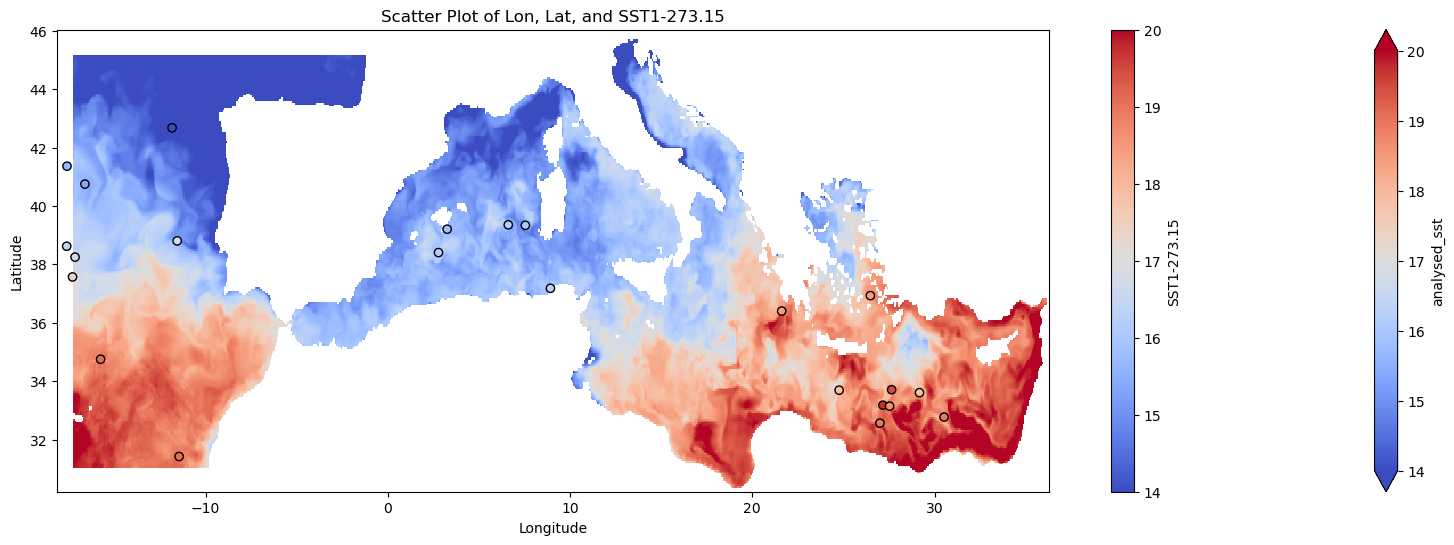

In [147]:
import matplotlib.pyplot as plt
#plt.pcolor(ds["longitude"],ds["latitude"],ds["analysed_sst"].isel(time=0)-273.15, cmap="coolwarm", aspect="auto")

# select the time of day from 0 to 23
step = 23
ds2_sub_step = cd.ragged.subset(ds2_sub, {"time": ds2_sub["time"].values[step]},rowsize_var_name='rowsize', row_dim_name='traj',obs_dim_name='obs')

#plt.figure()
(ds["analysed_sst"]-273.15).isel(time=step).plot(figsize=(20, 6), cmap="coolwarm",vmin=14,vmax=20)
plt.scatter(ds2_sub_step["lon"], ds2_sub_step["lat"], c=ds2_sub_step["sst1"]-273.15, cmap="coolwarm",vmin=14,vmax=20,edgecolors="black")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of Lon, Lat, and SST1-273.15")
plt.colorbar(label="SST1-273.15")
plt.show()